## Examine Role of Discretization

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.special import hermite

In [2]:
def read_eigen_file(filename):
    with open(filename) as f:
        data = f.readlines()

    # read number of discretization points
    npoints = int(data[0].split()[2])

    # get the x grid
    x_grid = np.array(data[1].split()[3:], dtype=float)
    
    # get eigenvalues and eigenvectors
    eigenvalues = np.zeros(npoints)
    eigenvectors = np.zeros((npoints, npoints))

    idx = 2
    for i in range(npoints):
        eigenvalues[i] = float(data[idx].split()[2])
        eigenvectors[i] = np.array(data[idx + 2].split(), dtype=float)
        idx += 3  # skip three rows

    return npoints, x_grid, eigenvalues, eigenvectors

In [3]:
def wavefunc(n, x):
    coeff = 1 / (np.sqrt(2 ** n * math.factorial(n)) * np.pi ** (1/4))
    return coeff * np.exp(-x ** 2 / 2) * hermite(n)(x)

In [4]:
def energies(n):
    return n + 0.5

In [5]:
def get_max_eigenvector_error(n, x_grid, eigenvector):
    wavefunc_n = wavefunc(n, x_grid)
    wavefunc_n /= np.linalg.norm(wavefunc_n)
    
    # consider 2 parities
    max_error_1 = np.abs(eigenvector - wavefunc_n).max()
    max_error_2 = np.abs(eigenvector + wavefunc_n).max()
    
    return min(max_error_1, max_error_2)

In [6]:
plot_dir = f"..{os.sep}plots"

## Load Data

In [7]:
xmax_list = [2.5, 5, 10, 15]
num_xmax = len(xmax_list)

In [8]:
N = 1000

In [9]:
x_grid = np.zeros((num_xmax, N))
eigenvalues = np.zeros((num_xmax, N))
eigenvectors = np.zeros((num_xmax, N, N))

for idx, xmax in enumerate(xmax_list):
    output_filename = f"..{os.sep}data{os.sep}solution_{N}_{xmax}.txt"
    _, x_grid[idx], eigenvalues[idx], eigenvectors[idx] = read_eigen_file(output_filename)

## Eigenvector Error

In [10]:
num_eigen = 16
eigenvector_error = np.zeros((num_xmax, num_eigen))

for i in range(num_xmax):
    for j in range(num_eigen):
        eigenvector_error[i, j] = get_max_eigenvector_error(j, x_grid[i], eigenvectors[i, :, j])

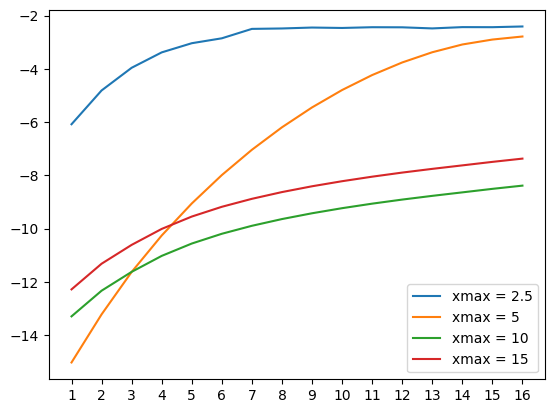

In [11]:
plt.plot(range(1, num_eigen + 1), np.log(eigenvector_error[0]), label="xmax = 2.5")
plt.plot(range(1, num_eigen + 1), np.log(eigenvector_error[1]), label="xmax = 5")
plt.plot(range(1, num_eigen + 1), np.log(eigenvector_error[2]), label="xmax = 10")
plt.plot(range(1, num_eigen + 1), np.log(eigenvector_error[3]), label="xmax = 15");
plt.xticks(range(1, num_eigen + 1))
plt.legend()
plt.savefig(f"{plot_dir}{os.sep}eigenfunction_error_xranges.pdf", format="pdf", bbox_inches="tight")

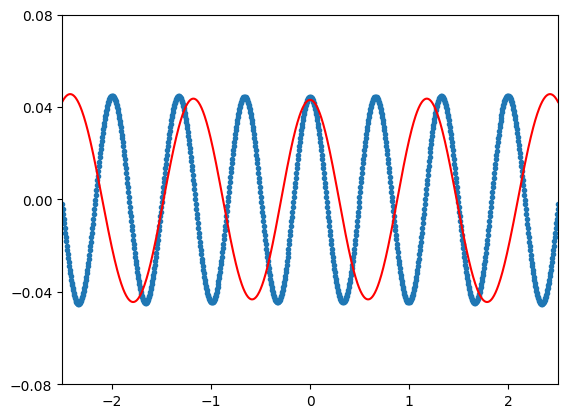

In [12]:
wavefunc_14 = -wavefunc(14, x_grid[0])
wavefunc_14 /= np.linalg.norm(wavefunc_14)
plt.plot(x_grid[0], eigenvectors[0, :, 14], '.', label="Numerical")
plt.plot(x_grid[0], wavefunc_14, 'r', label="Analytical")
plt.xlim([x_grid[0][0], x_grid[0][-1]])
plt.ylim([-0.08, 0.08])
plt.yticks([-0.08, -0.04, 0, 0.04, 0.08])
plt.savefig(f"{plot_dir}{os.sep}eigenfunction_15_xmax_2.5.pdf", format="pdf", bbox_inches="tight")

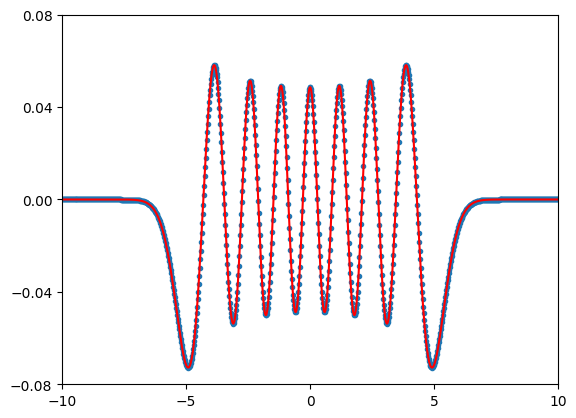

In [13]:
wavefunc_14 = -wavefunc(14, x_grid[2])
wavefunc_14 /= np.linalg.norm(wavefunc_14)
plt.plot(x_grid[2], eigenvectors[2, :, 14], '.', label="Numerical")
plt.plot(x_grid[2], wavefunc_14, 'r', label="Analytical")
plt.xlim([x_grid[2][0], x_grid[2][-1]])
plt.xticks([-10, -5, 0, 5, 10])
plt.yticks([-0.08, -0.04, 0, 0.04, 0.08])
plt.ylim([-0.08, 0.08])
plt.savefig(f"{plot_dir}{os.sep}eigenfunction_15_xmax_10.pdf", format="pdf", bbox_inches="tight")

## Eigenvalue Error

In [14]:
n = np.arange(N)

In [15]:
exact_energies = energies(n)

In [16]:
abs_error_eigenvalues = np.zeros((num_xmax, N))

for i in range(num_xmax):
    abs_error_eigenvalues[i] = np.abs((exact_energies - eigenvalues[i]) / exact_energies)

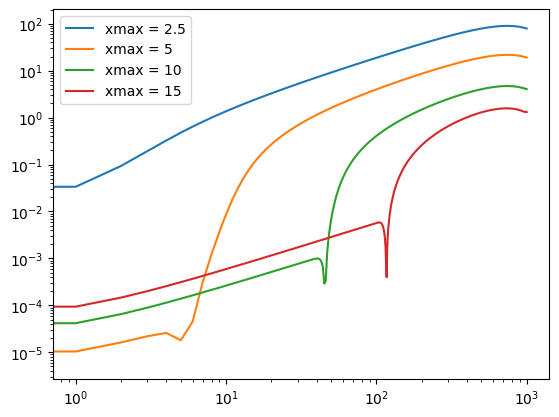

In [17]:
plt.loglog(range(N), abs_error_eigenvalues[0], label="xmax = 2.5")
plt.loglog(range(N), abs_error_eigenvalues[1], label="xmax = 5")
plt.loglog(range(N), abs_error_eigenvalues[2], label="xmax = 10")
plt.loglog(range(N), abs_error_eigenvalues[3], label="xmax = 15")
plt.legend()
plt.savefig(f"{plot_dir}{os.sep}eigenvalue_error_xranges.pdf", format="pdf", bbox_inches="tight")